In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import os

In [3]:
# remove scientific notation
pd.options.display.float_format = '{:.2f}'.format

### Function to load and read the datasets, then rename columns

In [4]:
def load_data(filename):
    if os.path.isdir('data/health'):
        print('***********************')
        print('Loading dataset ' + filename + '...\n')
        path = 'data/health/' + filename
        dataset = pd.read_csv(path)
        
        dataset = dataset.drop(columns=['location_id', 'sex_id', 'sex_name', 'age_id', 'age_name'])
        dataset = dataset.rename(columns={'location_name': 'country', 'val': 'value'})
        
        return dataset
        
    else:
        print('Directory not found')

In [5]:
# loop through files in the health folder, get the file number (last character before .csv),
# create variable names dynamically based on number of file, run the load_data function on each of them
files_list = []
for filename in os.listdir("data/health"):
    n_dataset = filename.replace(".csv", "")
    n_dataset = n_dataset[-1]
    files_list.append(filename)
    globals()[f"dataset_{n_dataset}"] = load_data(filename)




***********************
Loading dataset IHME-GBD_2019_DATA-b78e66c0-6.csv...

***********************
Loading dataset IHME-GBD_2019_DATA-b78e66c0-4.csv...

***********************
Loading dataset IHME-GBD_2019_DATA-b78e66c0-5.csv...

***********************
Loading dataset IHME-GBD_2019_DATA-b78e66c0-1.csv...

***********************
Loading dataset IHME-GBD_2019_DATA-b78e66c0-2.csv...

***********************
Loading dataset IHME-GBD_2019_DATA-b78e66c0-3.csv...



In [31]:
# test the function
dataset_6.shape

(159008, 11)

In [6]:
# test the dynamic var names work
dataset_3.head()

,measure_id,measure_name,country,cause_id,cause_name,metric_id,metric_name,year,value,upper,lower
0,4,YLLs (Years of Life Lost),Cameroon,366,Maternal disorders,3,Rate,2010,882.11,1154.11,588.14
1,4,YLLs (Years of Life Lost),Cameroon,380,Neonatal disorders,1,Number,2010,1502161.13,1816104.30,1229302.11
2,4,YLLs (Years of Life Lost),Cameroon,380,Neonatal disorders,2,Percent,2010,0.12,0.14,0.10
3,4,YLLs (Years of Life Lost),Cameroon,380,Neonatal disorders,3,Rate,2010,6832.85,8260.88,5591.70
4,4,YLLs (Years of Life Lost),Cameroon,386,Nutritional deficiencies,1,Number,2010,88020.50,146866.68,49982.16


### Append all datasets

In [7]:
master_health = dataset_1.append(dataset_2)
master_health = master_health.append(dataset_3)
master_health = master_health.append(dataset_4)
master_health = master_health.append(dataset_5)
master_health = master_health.append(dataset_6)
master_health.shape

(2659008, 11)

In [8]:
master_health.head()

,measure_id,measure_name,country,cause_id,cause_name,metric_id,metric_name,year,value,upper,lower
0,1,Deaths,Honduras,703,Poisoning by other means,1,Number,1990,61.10,77.42,47.35
1,1,Deaths,Honduras,703,Poisoning by other means,2,Percent,1990,0.00,0.00,0.00
2,1,Deaths,Honduras,703,Poisoning by other means,3,Rate,1990,1.30,1.64,1.01
3,1,Deaths,Bangladesh,521,Cirrhosis and other chronic liver diseases,1,Number,1990,26628.43,32225.29,20798.90
4,1,Deaths,Bangladesh,521,Cirrhosis and other chronic liver diseases,2,Percent,1990,0.02,0.03,0.02


In [9]:
master_health.head()

,measure_id,measure_name,country,cause_id,cause_name,metric_id,metric_name,year,value,upper,lower
0,1,Deaths,Honduras,703,Poisoning by other means,1,Number,1990,61.10,77.42,47.35
1,1,Deaths,Honduras,703,Poisoning by other means,2,Percent,1990,0.00,0.00,0.00
2,1,Deaths,Honduras,703,Poisoning by other means,3,Rate,1990,1.30,1.64,1.01
3,1,Deaths,Bangladesh,521,Cirrhosis and other chronic liver diseases,1,Number,1990,26628.43,32225.29,20798.90
4,1,Deaths,Bangladesh,521,Cirrhosis and other chronic liver diseases,2,Percent,1990,0.02,0.03,0.02


### Load dataset with country names and iso3 codes - used to standardize all data form the various data sources

In [10]:
country_list = pd.read_csv('final_datasets/all_countries.csv')
# change name of the Code column to match df
country_list.head()

,country,iso3
0,Afghanistan,AFG
1,Angola,AGO
2,Albania,ALB
3,United Arab Emirates,ARE
4,Argentina,ARG


### Check for differences in the country names

In [11]:
def check_for_differences(dataset):
    unique_in_dataset = dataset['country'].unique()
    unique_in_country_list = country_list['country'].unique()

    # find the countries that are in iso list but not in the dataset
    countries_not_in_dataset = list(set(unique_in_country_list) - set(unique_in_dataset))
    countries_not_in_dataset.sort()

    # find the countries that are in the data but not in iso list
    countries_not_in_country_list = list(set(unique_in_dataset) - set(unique_in_country_list))
    countries_not_in_country_list.sort()

    print('\nUnique countries in country list:', len(countries_not_in_dataset))
    print('\nCountries in country list but not in the dataset:', len(countries_not_in_dataset), '\n', 
          countries_not_in_dataset)
    
    print('Unique countries in dataset:', len(countries_not_in_country_list))
    print('Countries NOT in country list ', len(countries_not_in_country_list), '\n', countries_not_in_country_list)
    
    countries_not_in_both_datasets = countries_not_in_dataset + countries_not_in_country_list
    return countries_not_in_both_datasets


In [12]:
check_for_differences(master_health)


Countries in country list but not in the dataset: 21 
 ['Bolivia', 'Brunei', 'Cape Verde', "Cote d'Ivoire", 'Czech Republic', 'Federated States of Micronesia', 'Iran', 'Laos', 'Macedonia', 'Moldova', 'Russia', 'South Korea', 'Swaziland', 'Syria', 'Taiwan', 'Tanzania', 'The Bahamas', 'The Gambia', 'United States', 'Venezuela', 'Vietnam']
Countries NOT in country list  41 
 ['American Samoa', 'Andorra', 'Bahamas', 'Bermuda', 'Bolivia (Plurinational State of)', 'Brunei Darussalam', 'Cabo Verde', 'Cook Islands', 'Czechia', "Côte d'Ivoire", "Democratic People's Republic of Korea", 'Eswatini', 'Gambia', 'Global', 'Greenland', 'Guam', 'Iran (Islamic Republic of)', "Lao People's Democratic Republic", 'Micronesia (Federated States of)', 'Monaco', 'Nauru', 'Niue', 'North Macedonia', 'Northern Mariana Islands', 'Palau', 'Puerto Rico', 'Republic of Korea', 'Republic of Moldova', 'Russian Federation', 'Saint Kitts and Nevis', 'San Marino', 'Somalia', 'Syrian Arab Republic', 'Taiwan (Province of Ch

['Bolivia',
 'Brunei',
 'Cape Verde',
 "Cote d'Ivoire",
 'Czech Republic',
 'Federated States of Micronesia',
 'Iran',
 'Laos',
 'Macedonia',
 'Moldova',
 'Russia',
 'South Korea',
 'Swaziland',
 'Syria',
 'Taiwan',
 'Tanzania',
 'The Bahamas',
 'The Gambia',
 'United States',
 'Venezuela',
 'Vietnam',
 'American Samoa',
 'Andorra',
 'Bahamas',
 'Bermuda',
 'Bolivia (Plurinational State of)',
 'Brunei Darussalam',
 'Cabo Verde',
 'Cook Islands',
 'Czechia',
 "Côte d'Ivoire",
 "Democratic People's Republic of Korea",
 'Eswatini',
 'Gambia',
 'Global',
 'Greenland',
 'Guam',
 'Iran (Islamic Republic of)',
 "Lao People's Democratic Republic",
 'Micronesia (Federated States of)',
 'Monaco',
 'Nauru',
 'Niue',
 'North Macedonia',
 'Northern Mariana Islands',
 'Palau',
 'Puerto Rico',
 'Republic of Korea',
 'Republic of Moldova',
 'Russian Federation',
 'Saint Kitts and Nevis',
 'San Marino',
 'Somalia',
 'Syrian Arab Republic',
 'Taiwan (Province of China)',
 'Tokelau',
 'Tuvalu',
 'United 

In [13]:
master_health.head()

,measure_id,measure_name,country,cause_id,cause_name,metric_id,metric_name,year,value,upper,lower
0,1,Deaths,Honduras,703,Poisoning by other means,1,Number,1990,61.10,77.42,47.35
1,1,Deaths,Honduras,703,Poisoning by other means,2,Percent,1990,0.00,0.00,0.00
2,1,Deaths,Honduras,703,Poisoning by other means,3,Rate,1990,1.30,1.64,1.01
3,1,Deaths,Bangladesh,521,Cirrhosis and other chronic liver diseases,1,Number,1990,26628.43,32225.29,20798.90
4,1,Deaths,Bangladesh,521,Cirrhosis and other chronic liver diseases,2,Percent,1990,0.02,0.03,0.02


In [33]:
country_name_differences = [
    {
        'short': 'Bolivia',
        'long': 'Bolivia (Plurinational State of)'
    },
    {
        'short': 'Brunei',
        'long': 'Brunei Darussalam'
    },
    {
        'short': 'Cape Verde',
        'long': 'Cabo Verde'
    },
    {
        'short': "Cote d'Ivoire",
        'long': "Côte d'Ivoire"
    },
    {
        'short': 'Czech Republic',
        'long': 'Czechia'
    },
    {
        'short': 'Federated States of Micronesia',
        'long': 'Micronesia (Federated States of)'
    },
    {
        'short': 'Iran',
        'long': 'Iran (Islamic Republic of)'
    },
    {
        'short': 'Laos',
        'long': "Lao People's Democratic Republic"
    },
    {
        'short': 'Macedonia',
        'long': 'North Macedonia'
    },
    {
        'short': 'Moldova',
        'long': 'Republic of Moldova'
    },
    {
        'short': 'Russia',
        'long': 'Russian Federation'
    },
    {
        'short': 'South Korea',
        'long': 'Republic of Korea'
    },
    {
        'short': 'Syria',
        'long': 'Syrian Arab Republic'
    },
    {
        'short': 'Taiwan',
        'long': 'Taiwan (Province of China)'
    },
    {
        'short': 'Tanzania',
        'long': 'United Republic of Tanzania'
    },
    {
        'short': 'The Bahamas',
        'long': 'Bahamas'
    },
    {
        'short': 'The Gambia',
        'long': 'Gambia'
    },
    {
        'short': 'United States',
        'long': 'United States of America'
    },
    {
        'short': 'Venezuela',
        'long': 'Venezuela (Bolivarian Republic of)'
    },
    {
        'short': 'Vietnam',
        'long': 'Viet Nam'
    }
]
print(len(country_name_differences))
print(country_name_differences)

20
[{'short': 'Bolivia', 'long': 'Bolivia (Plurinational State of)'}, {'short': 'Brunei', 'long': 'Brunei Darussalam'}, {'short': 'Cape Verde', 'long': 'Cabo Verde'}, {'short': "Cote d'Ivoire", 'long': "Côte d'Ivoire"}, {'short': 'Czech Republic', 'long': 'Czechia'}, {'short': 'Federated States of Micronesia', 'long': 'Micronesia (Federated States of)'}, {'short': 'Iran', 'long': 'Iran (Islamic Republic of)'}, {'short': 'Laos', 'long': "Lao People's Democratic Republic"}, {'short': 'Macedonia', 'long': 'North Macedonia'}, {'short': 'Moldova', 'long': 'Republic of Moldova'}, {'short': 'Russia', 'long': 'Russian Federation'}, {'short': 'South Korea', 'long': 'Republic of Korea'}, {'short': 'Syria', 'long': 'Syrian Arab Republic'}, {'short': 'Taiwan', 'long': 'Taiwan (Province of China)'}, {'short': 'Tanzania', 'long': 'United Republic of Tanzania'}, {'short': 'The Bahamas', 'long': 'Bahamas'}, {'short': 'The Gambia', 'long': 'Gambia'}, {'short': 'United States', 'long': 'United States of

### Standardize names of the countries between datasets

In [15]:
for country in country_name_differences:
  master_health['country'] = np.where(master_health['country'] == country['long'], country['short'], master_health['country'])

master_health.head()


,measure_id,measure_name,country,cause_id,cause_name,metric_id,metric_name,year,value,upper,lower
0,1,Deaths,Honduras,703,Poisoning by other means,1,Number,1990,61.10,77.42,47.35
1,1,Deaths,Honduras,703,Poisoning by other means,2,Percent,1990,0.00,0.00,0.00
2,1,Deaths,Honduras,703,Poisoning by other means,3,Rate,1990,1.30,1.64,1.01
3,1,Deaths,Bangladesh,521,Cirrhosis and other chronic liver diseases,1,Number,1990,26628.43,32225.29,20798.90
4,1,Deaths,Bangladesh,521,Cirrhosis and other chronic liver diseases,2,Percent,1990,0.02,0.03,0.02


In [16]:
master_health.shape

(2659008, 11)

In [17]:
countries_to_remove = check_for_differences(master_health)


Countries in country list but not in the dataset: 1 
 ['Swaziland']
Countries NOT in country list  21 
 ['American Samoa', 'Andorra', 'Bermuda', 'Cook Islands', "Democratic People's Republic of Korea", 'Eswatini', 'Global', 'Greenland', 'Guam', 'Monaco', 'Nauru', 'Niue', 'Northern Mariana Islands', 'Palau', 'Puerto Rico', 'Saint Kitts and Nevis', 'San Marino', 'Somalia', 'Tokelau', 'Tuvalu', 'United States Virgin Islands']


### drop the countries that are not in both datasets

In [18]:
master_health = master_health[master_health.country.isin(countries_to_remove) == False] # from health dataset
country_list = country_list[country_list.country.isin(countries_to_remove) == False] # from nutrition dataset

In [19]:
master_health['country'].nunique()

184

In [20]:
master_health['country'].unique()

array(['Honduras', 'Bangladesh', 'Kuwait', 'Lesotho', 'Greece',
       'Azerbaijan', 'Djibouti', 'Montenegro', 'Brunei', 'Liberia',
       'Chile', 'Argentina', 'Guinea-Bissau', 'Thailand', 'Lebanon',
       'Haiti', 'Georgia', 'Kiribati', 'Timor-Leste', 'Mexico', 'Guyana',
       'Poland', 'Eritrea', 'Uruguay', 'Japan', 'Iceland', 'Ethiopia',
       'China', 'Mali', 'Libya', 'Namibia', 'Marshall Islands',
       'Kazakhstan', 'Bhutan', 'Vietnam', 'Jamaica', 'Nicaragua',
       'South Korea', 'Romania', 'Saint Lucia', 'Mauritania', 'Canada',
       'Kyrgyzstan', 'Kenya', 'Ireland', 'Morocco', 'South Africa',
       'Federated States of Micronesia', 'Singapore', 'South Sudan',
       'India', 'Panama', 'United States', 'Fiji', 'Serbia', 'Mongolia',
       'Saint Vincent and the Grenadines', 'Israel', 'Niger', 'Nepal',
       'Taiwan', 'Tajikistan', 'Zimbabwe', 'Australia', 'Slovakia',
       'Pakistan', 'Italy', 'Brazil', 'Venezuela', 'Palestine', 'Sudan',
       'Nigeria', 'Suriname', 

In [21]:
master_health.head()

,measure_id,measure_name,country,cause_id,cause_name,metric_id,metric_name,year,value,upper,lower
0,1,Deaths,Honduras,703,Poisoning by other means,1,Number,1990,61.10,77.42,47.35
1,1,Deaths,Honduras,703,Poisoning by other means,2,Percent,1990,0.00,0.00,0.00
2,1,Deaths,Honduras,703,Poisoning by other means,3,Rate,1990,1.30,1.64,1.01
3,1,Deaths,Bangladesh,521,Cirrhosis and other chronic liver diseases,1,Number,1990,26628.43,32225.29,20798.90
4,1,Deaths,Bangladesh,521,Cirrhosis and other chronic liver diseases,2,Percent,1990,0.02,0.03,0.02


### Merge the two datasets - country names and conditions

In [22]:
master_health = pd.merge(master_health, country_list, how="left", on="country")
master_health.head()

,measure_id,measure_name,country,cause_id,cause_name,metric_id,metric_name,year,value,upper,lower,iso3
0,1,Deaths,Honduras,703,Poisoning by other means,1,Number,1990,61.10,77.42,47.35,HND
1,1,Deaths,Honduras,703,Poisoning by other means,2,Percent,1990,0.00,0.00,0.00,HND
2,1,Deaths,Honduras,703,Poisoning by other means,3,Rate,1990,1.30,1.64,1.01,HND
3,1,Deaths,Bangladesh,521,Cirrhosis and other chronic liver diseases,1,Number,1990,26628.43,32225.29,20798.90,BGD
4,1,Deaths,Bangladesh,521,Cirrhosis and other chronic liver diseases,2,Percent,1990,0.02,0.03,0.02,BGD


In [23]:
master_health.head()

,measure_id,measure_name,country,cause_id,cause_name,metric_id,metric_name,year,value,upper,lower,iso3
0,1,Deaths,Honduras,703,Poisoning by other means,1,Number,1990,61.10,77.42,47.35,HND
1,1,Deaths,Honduras,703,Poisoning by other means,2,Percent,1990,0.00,0.00,0.00,HND
2,1,Deaths,Honduras,703,Poisoning by other means,3,Rate,1990,1.30,1.64,1.01,HND
3,1,Deaths,Bangladesh,521,Cirrhosis and other chronic liver diseases,1,Number,1990,26628.43,32225.29,20798.90,BGD
4,1,Deaths,Bangladesh,521,Cirrhosis and other chronic liver diseases,2,Percent,1990,0.02,0.03,0.02,BGD


In [24]:
years = master_health['year'].unique()
print(years)

[1990 1995 2000 2005 2010 2015 2018 2019]


In [25]:
master_health.shape

(2386752, 12)

In [190]:
# save master_health to csv
master_health.to_csv('final_datasets/all_health_appended.csv', index=False)

### Filter and plot data - testing quality of data and processing

In [196]:
# food = country_list[ country_list['year'] == 1995 ]
# food #04_median

,Unnamed: 0,Label,iso3,region,year,05_median,05_upperci_95,05_lowerci_95,04_median,04_upperci_95,...,16_lowerci_95,17_median,17_upperci_95,17_lowerci_95,28_median,28_upperci_95,28_lowerci_95,29_median,29_upperci_95,29_lowerci_95
1,1,Afghanistan,AFG,SAARC,1995.0,71.775725,148.634712,34.698625,59.352732,138.198957,...,1.852939,0.541450,0.959193,0.263879,5.052619,9.719256,2.252049,2.603491,2.818941,2.404726
8,8,Angola,AGO,SSA,1995.0,38.153402,57.282848,26.775923,58.916089,88.710471,...,13.522741,0.190012,0.319241,0.118497,10.102110,15.067837,6.078610,2.658841,2.860430,2.496143
15,15,Albania,ALB,FSU,1995.0,31.246881,38.993423,24.988629,68.483204,92.315449,...,24.527016,0.156665,0.248671,0.098392,13.907799,18.736272,9.909669,2.460526,2.618484,2.343612
22,23,United Arab Emirates,ARE,MENA,1995.0,24.275148,47.222170,12.741514,24.510926,52.852326,...,12.931817,0.466106,0.802683,0.283615,10.350116,11.263449,9.478955,2.396186,2.431612,2.362884
29,30,Argentina,ARG,LAC,1995.0,3.139180,4.238687,2.331894,8.216766,11.628236,...,7.176007,0.183498,0.212985,0.157801,11.087092,11.646321,10.550328,2.649652,2.676040,2.623337
36,37,Armenia,ARM,FSU,1995.0,14.336341,21.257463,9.745004,100.882861,129.622875,...,22.392101,0.540270,0.875128,0.331952,12.910660,17.115606,9.351172,2.496760,2.663610,2.379850
43,44,Antigua and Barbuda,ATG,LAC,1995.0,56.004443,93.257217,34.006991,45.142990,80.894465,...,14.428347,0.031930,0.055425,0.019488,8.198279,11.467268,5.673200,2.674702,2.818622,2.563780
50,51,Australia,AUS,HIC,1995.0,23.689506,33.123716,17.080083,9.622616,20.865024,...,33.276164,1.053701,1.454012,0.757982,11.484436,14.336127,8.890667,2.595424,2.627722,2.562823
57,58,Austria,AUT,HIC,1995.0,2.008445,3.106064,1.307037,24.917910,51.810388,...,20.957106,1.021052,1.259028,0.822004,13.149669,16.548619,10.285345,2.801753,2.841364,2.763411
64,65,Azerbaijan,AZE,FSU,1995.0,15.131869,20.101696,11.464456,47.990811,58.927177,...,23.469798,0.459021,0.707993,0.302647,18.967121,24.718115,13.834259,2.459124,2.616374,2.340171


In [197]:
# filtered_data.head()

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,1,Deaths,129,Honduras,3,Both,22,All Ages,703,Poisoning by other means,1,Number,1990,61.099487,77.418662,47.345706
1,1,Deaths,129,Honduras,3,Both,22,All Ages,703,Poisoning by other means,2,Percent,1990,0.002212,0.002781,0.001731
2,1,Deaths,129,Honduras,3,Both,22,All Ages,703,Poisoning by other means,3,Rate,1990,1.297629,1.644216,1.005527
3,1,Deaths,161,Bangladesh,3,Both,22,All Ages,521,Cirrhosis and other chronic liver diseases,1,Number,1990,26628.429130,32225.285311,20798.897909
4,1,Deaths,161,Bangladesh,3,Both,22,All Ages,521,Cirrhosis and other chronic liver diseases,2,Percent,1990,0.023659,0.028261,0.018677


In [218]:
# health = filtered_data[ (filtered_data['year'] == 1995) & (filtered_data['measure_name'] == 'Incidence') & (filtered_data['metric_name'] == 'Percent') & (filtered_data['cause_name'] == 'Neoplasms') ]

# health = filtered_data[ (filtered_data['year'] == 1995)]


In [219]:
# health = health.rename(columns={'location_name': 'Label'})


In [222]:
# df = pd.merge(health, food, how="left", on="Label")

184

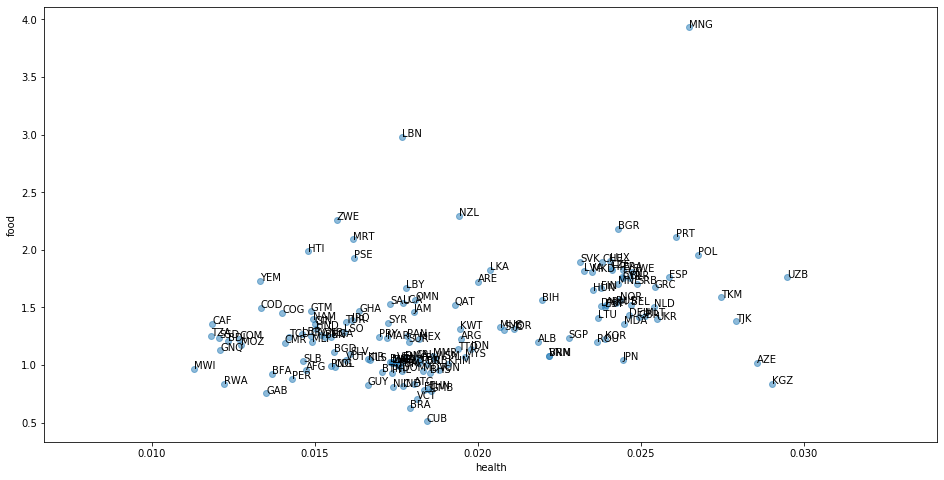

Series([], Name: val, dtype: float64)

In [293]:
# condition = 'Headache disorders'
# food = '48_median'
# subset = df[(df['measure_name'] == 'Incidence') & (df['metric_name'] == 'Percent') & (df['cause_name'] == condition)]
# subset

# labels = subset['iso3'].unique()

# fig, ax = plt.subplots()

# fig.set_figheight(8)
# fig.set_figwidth(16)

# ax.scatter(subset['val'], subset[food], alpha=0.5)

# for i, txt in enumerate(labels):
# #     print(i, txt)
#     ax.annotate(txt, ( np.stack(subset['val']).astype(None)[i], np.stack(subset[food]).astype(None)[i]))

# plt.xlabel("health")
# plt.ylabel("food")
# plt.show()


# subset[subset['iso3'] == 'ECU']['val']